<a href="https://colab.research.google.com/github/JuanPabloP23/Proyecto-An-lisis-de-datos/blob/main/Modelo_De_Utilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimación de la utilidad mensual para Banco de Occidente.
Los datos provienen de fuentes públicas por parte de superintendencia financiera.

**1. Contexto**

Dentro de las organizaciones llevar a cabo un plan hacía el futuro para poder tener un objetivo para el cual organizar sus recursos de la manera más efectiva posible. Por esto dentro de área de planeación financiera de Banco de Occidente se propone un modelo matemático para poder entender y poder predecir como se comporatarían los resultados financieros del banco con base a un escenario macroeconómico propuesto. Por lo tanto el siguiente proyecto da las bas.

**2. Pregunta SMART**

¿Es posible hacer un modelo de pronóstico para predecir la utilidad del banco de occidente en un horizonte de dos años con una precisión de 10%?.

*   Específica: Se enfoca en una sola entidad (Banco de Occidente), una variable concreta (utilidad) y un horizonte definido (2 años).

* Medible: La precisión del 10% es un criterio cuantitativo verificable mediante métricas de error como MAPE o RMSE.

* Alcanzable: Un margen de error del 10% es exigente pero viable en pronósticos financieros considerando la incertidumbre de factores externos.

* Relevante: La predicción de la utilidad es fundamental para la toma de decisiones estratégicas, de inversión y académicas.

* Temporal: El plazo está claramente establecido en 2 años.


**3. Descripción de los campos**
                 
 * BANCO DE OCCIDENTE S.A.: Utilidad neta mensual del banco despues de impuestos.  

 * DESEMPLEO_URBANO_: Porcentaje de la población económicamente activa en zonas urbanas sin empleo.

 * TRM: Valor promedio del dólar en pesos colombianos

 * USURA_CONSUMO_COMERCIAL: Tasa máxima de interés legal en créditos de consumo y comerciales.

* TASA_INTERVENCION_BANREP: Tasa de referencia fijada por el Banco de la República.

* IBR_3M: Indicador Bancario de Referencia a 3 meses, tasa interbancaria de corto plazo.

* DTF_EA: Tasa promedio anual de captación de CDT en el sistema financiero.

 * INFLACION ANUAL: Variación porcentual anual del Índice de Precios al Consumidor (IPC).

 * INFLACION MES: Variación mensual del IPC.

 * ISE: Índice de Seguimiento a la Economía, refleja la actividad económica del país.

 * Provisones: Reservas contables del banco para cubrir cartera riesgosa.              

**4. Cargamos los datos**


In [1]:
pip install pmdarima

In [2]:
pip install numpy==1.26

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm


df = pd.read_excel('Utilidad BDO.xlsx', index_col = 'Fecha') # Con indice de fechas ya que es una serie de tiempo





Verificamos la base


In [4]:
df.head()


<bound method NDFrame.head of             BANCO DE OCCIDENTE S.A.  DESEMPLEO_URBANO_     TRM  \
Fecha                                                            
2019-01-31             4.356486e+10           0.137393  3163.0   
2019-02-28             3.675234e+10           0.124274  3072.0   
2019-03-31             5.245682e+10           0.119751  3175.0   
2019-04-30             4.937206e+10           0.111443  3248.0   
2019-05-31             3.358929e+10           0.112390  3358.0   
...                             ...                ...     ...   
2025-02-28             4.657417e+10           0.132258  4200.0   
2025-03-31             5.276859e+10           0.125758  4200.0   
2025-04-30             5.610283e+10           0.126564  4200.0   
2025-05-31             4.179832e+10           0.123923  4200.0   
2025-06-30             5.588806e+10           0.125659  4192.0   

            USURA_CONSUMO_COMERCIAL  TASA_INTERVENCION_BANREP    IBR_3M  \
Fecha                                                                     
2019-01-31                 0.287400                    0.0425  0.041320   
2019-02-28                 0.295500                    0.0425  0.041400   
2019-03-31                 0.290600                    0.0425  0.041360   
2019-04-30                 0.289800                    0.0425  0.041350   
2019-05-31                 0.290100                    0.0425  0.041260   
...                             ...                       ...       ...   
2025-02-28                 0.273075                    0.0800  0.072711   
2025-03-31                 0.267887                    0.0725  0.070528   
2025-04-30                 0.264651                    0.0675  0.067683   
2025-05-31                 0.261854                    0.0675  0.064023   
2025-06-30                 0.259050                    0.0650  0.063013   

              DTF_EA  INFLACION ANUAL  INFLACION MES         ISE  Provisones  
Fecha                                                                         
2019-01-31  0.046200         0.031477       0.006000  107.893100           0  
2019-02-28  0.045700         0.030136       0.005765  108.865086           0  
2019-03-31  0.045100         0.032199       0.004349  107.520459           0  
2019-04-30  0.045400         0.032454       0.004920  108.992354           0  
2019-05-31  0.044700         0.033078       0.003134  110.031760           0  
...              ...              ...            ...         ...         ...  
2025-02-28  0.075631         0.048467       0.007005  124.836302           0  
2025-03-31  0.071127         0.047054       0.005690  123.822584           0  
2025-04-30  0.067971         0.044535       0.003517  125.616814           0  
2025-05-31  0.066256         0.042840       0.002586  125.428359           0  
2025-06-30  0.064730         0.041434       0.001866  124.026019           0  

[78 rows x 11 columns]>

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2019-01-31 to 2025-06-30
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BANCO DE OCCIDENTE S.A.   78 non-null     float64
 1   DESEMPLEO_URBANO_         78 non-null     float64
 2   TRM                       78 non-null     float64
 3   USURA_CONSUMO_COMERCIAL   78 non-null     float64
 4   TASA_INTERVENCION_BANREP  78 non-null     float64
 5   IBR_3M                    78 non-null     float64
 6   DTF_EA                    78 non-null     float64
 7   INFLACION ANUAL           78 non-null     float64
 8   INFLACION MES             78 non-null     float64
 9   ISE                       78 non-null     float64
 10  Provisones                78 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 7.3 KB


Podemos observar que no hay nulos. Procedemos a renombrar la variable 'BANCO DE OCCIDENTE S.A.' a utilidad

In [6]:
df.columns

Index(['BANCO DE OCCIDENTE S.A.', 'DESEMPLEO_URBANO_', 'TRM',
       'USURA_CONSUMO_COMERCIAL', 'TASA_INTERVENCION_BANREP', 'IBR_3M',
       'DTF_EA', 'INFLACION ANUAL', 'INFLACION MES', 'ISE', 'Provisones'],
      dtype='object')

In [7]:
df = df.rename(columns={'BANCO DE OCCIDENTE S.A.': 'UTILIDAD'})

**5. Empezamos con el análisis exploratorio debido a que los datos ya se encuentran limpios.**

In [8]:
df.describe()

,UTILIDAD,DESEMPLEO_URBANO_,TRM,USURA_CONSUMO_COMERCIAL,TASA_INTERVENCION_BANREP,IBR_3M,DTF_EA,INFLACION ANUAL,INFLACION MES,ISE,Provisones
count,7.800000e+01,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.843242e+10,0.128286,3924.854744,0.310746,0.068205,0.066893,0.069319,0.062356,0.005162,114.949408,0.089744
std,1.501743e+10,0.037498,413.671492,0.060673,0.042684,0.040134,0.040562,0.036385,0.004294,8.387085,0.287664
min,6.753246e+09,0.086550,3072.000000,0.256200,0.017500,0.016590,0.017400,0.014873,-0.003702,86.895520,0.000000
25%,2.983164e+10,0.103531,3716.000000,0.271500,0.033750,0.030817,0.039019,0.035338,0.002530,109.890855,0.000000
50%,3.780270e+10,0.115692,3913.000000,0.286200,0.046250,0.061690,0.051758,0.050477,0.004449,118.468520,0.000000
75%,4.979885e+10,0.140803,4191.750000,0.332475,0.111875,0.109691,0.105066,0.091899,0.007036,121.027101,0.000000
max,7.805879e+10,0.248705,4819.000000,0.470900,0.132500,0.125610,0.143000,0.133408,0.017774,125.616814,1.000000


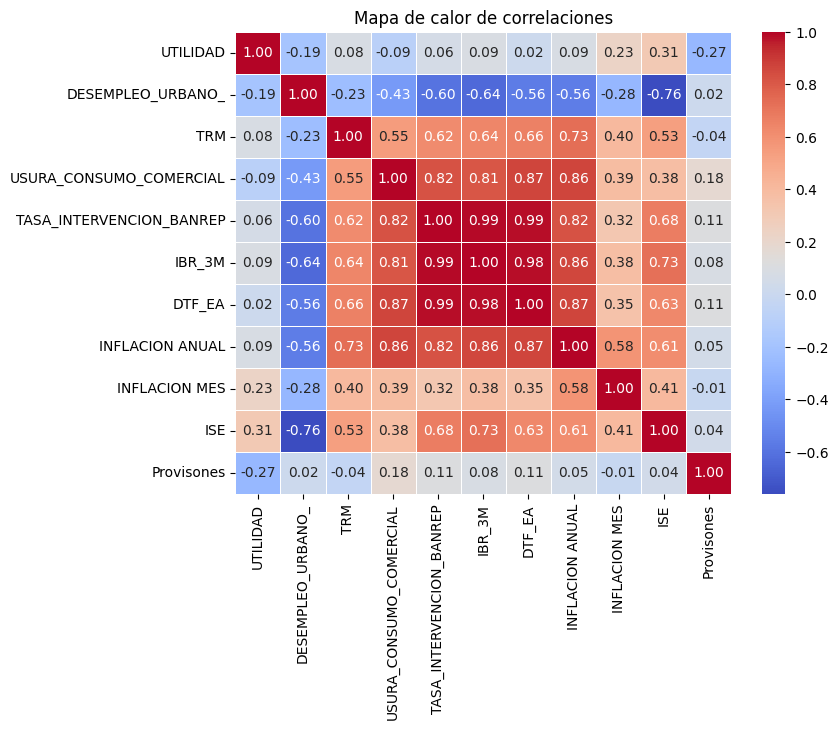

In [11]:
import seaborn as sns

df.corr()
# Calcular matriz de correlaciones
corr = df.corr()

# Crear heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

Graficamos mimso eje para ver si encontramos relaciones que nos pueden dar pistas de como modelar la variable

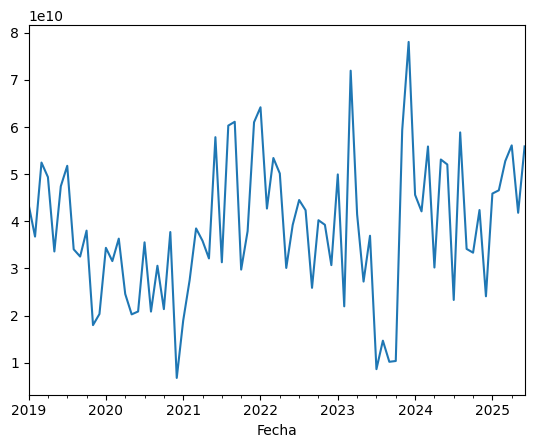

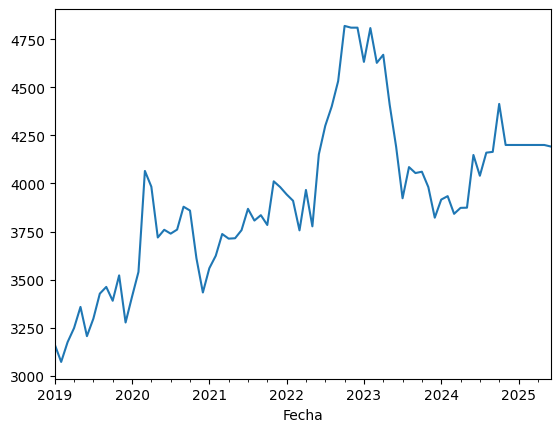

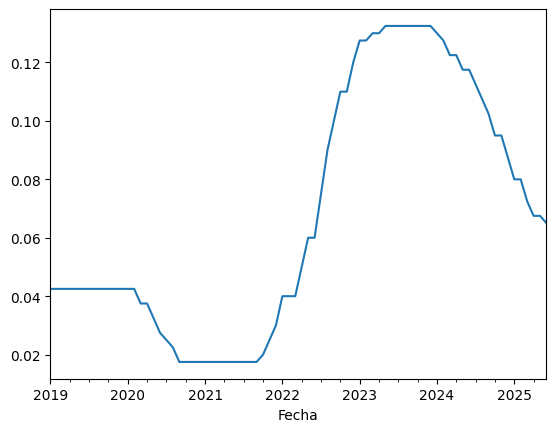

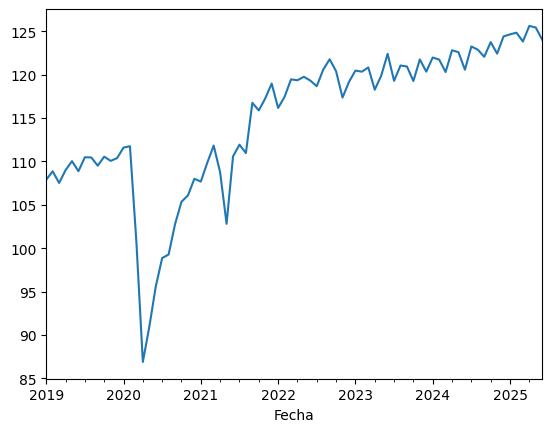

In [12]:
df['UTILIDAD'].plot()
plt.show()


df['TRM'].plot()
plt.show()

df['TASA_INTERVENCION_BANREP'].plot()
plt.show()

df['ISE'].plot()
plt.show()



Empezamos experimentando con los datos, ya que el analisis exploratorio no es suficientmente conclusivo

In [13]:
from sklearn.model_selection import train_test_split
objetivo = 'UTILIDAD'
exog = ['TASA_INTERVENCION_BANREP', 'ISE', 'TRM']


x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.2)





Importamos una regresión lineal como primer paso y tener un baseline para comparar modelos mas complejos

In [14]:
from sklearn.linear_model import LinearRegression

modelo_reg = LinearRegression()

modelo_reg.fit(x_train,y_train)

print(modelo_reg.coef_) # Inspeccionamos los coeficientes del modelo




[-1.05648400e+11  9.18339653e+08  3.50989304e+04]


In [15]:
pred_modelo = pd.Series(modelo_reg.predict(x_test), index = x_test.index)
pred_modelo.tail()

,0
Fecha,
2025-02-28,4.607405e+10
2025-03-31,4.593548e+10
2025-04-30,4.811144e+10
2025-05-31,4.793837e+10
2025-06-30,4.691439e+10


El modelo de regresión para predecir un promedio de la utilidad, y levenmente parece capturar una tendencia.

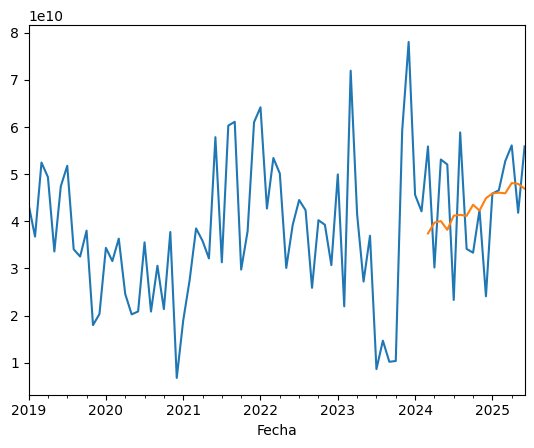

In [16]:
df['UTILIDAD'].plot()
pred_modelo.plot()
plt.show()

Procedemos calcular algunas metricas para tener punto de comparación en el futuro

In [17]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score

rmse = root_mean_squared_error(y_test, pred_modelo)
mape = mean_absolute_percentage_error(y_test, pred_modelo)
r2 = r2_score(y_test, pred_modelo)

print(f'rmse del modelo: {rmse}')
print(f'mape del modelo: {mape}')
print(f'R^2 del modelo : {r2}')



rmse del modelo: 11819098710.572697
mape del modelo: 0.26196396505420655
R^2 del modelo : -0.054866092917431164


Debido a que el resultado del modelo no es satisfactorio empezamos utilizando técnicas de ingenieria de características. El primer paso será aplicar la transformación logrítmica a la variable objetivo para ver si esto permite mejorar los resultados

In [18]:
import numpy as np
df['log_UTILIDAD'] = np.log(df['UTILIDAD'])

rmse del modelo: 12088183522.887308
mape del modelo: 0.2580333967807524


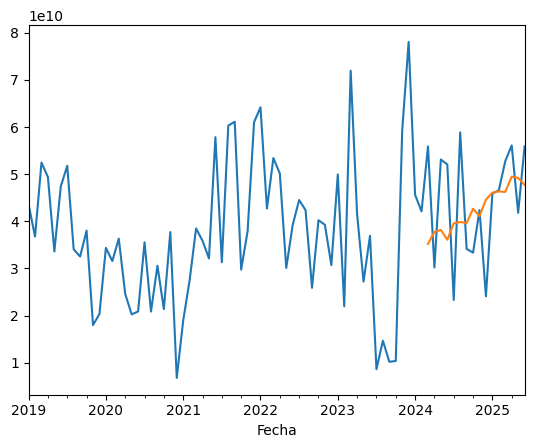

In [19]:
objetivo = 'log_UTILIDAD'
exog = ['TASA_INTERVENCION_BANREP', 'ISE', 'Provisones']

x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.20)

modelo_reg = LinearRegression()

modelo_reg.fit(x_train,y_train)

pred_modelo = pd.Series(modelo_reg.predict(x_test), index = x_test.index)

rmse = root_mean_squared_error(np.exp(y_test), np.exp(pred_modelo))
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_modelo))
r2 = r2_score(y_test, pred_modelo)

print(f'rmse del modelo: {rmse}')
print(f'mape del modelo: {mape}')

df['UTILIDAD'].plot()
np.exp(pred_modelo).plot()
plt.show()

Incluimos variables dummy mensuales para ver si podemos capturar patrones mensuales dentro de los datos para capturar mayor la variabilidad de la serie.

In [20]:
df['Mes'] = df.index.month

df['Mes'].head()

dummies = pd.get_dummies(df['Mes'], dtype= 'int', drop_first= True)

df = pd.concat([df, dummies], axis = 1)


In [21]:
df.columns = df.columns.astype('str')
df.columns

Index(['UTILIDAD', 'DESEMPLEO_URBANO_', 'TRM', 'USURA_CONSUMO_COMERCIAL',
       'TASA_INTERVENCION_BANREP', 'IBR_3M', 'DTF_EA', 'INFLACION ANUAL',
       'INFLACION MES', 'ISE', 'Provisones', 'log_UTILIDAD', 'Mes', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

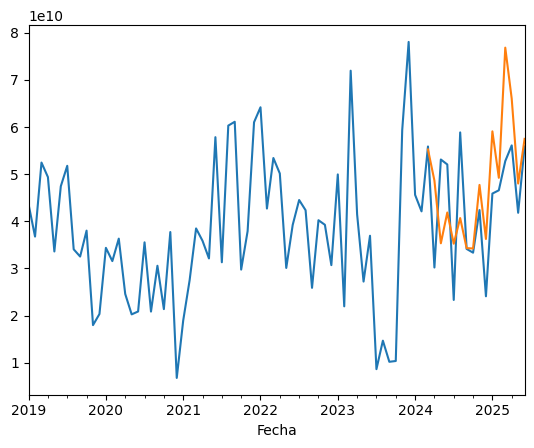

rmse del modelo: 12017842158.783401
mape del modelo: 0.23696449645292636


In [22]:

objetivo = 'log_UTILIDAD'
exog = ['IBR_3M', 'Provisones','ISE','2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12' ]

x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.20)

modelo_reg = LinearRegression()

modelo_reg.fit(x_train,y_train)

pred_modelo = pd.Series(modelo_reg.predict(x_test), index = x_test.index)

df['UTILIDAD'].plot()
np.exp(pred_modelo).plot()
plt.show()

rmse = root_mean_squared_error(np.exp(y_test), np.exp(pred_modelo))
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_modelo))
r2 = r2_score(y_test, pred_modelo)

print(f'rmse del modelo: {rmse}')
print(f'mape del modelo: {mape}')


In [23]:


objetivo = 'log_UTILIDAD'
exog = ['IBR_3M','Provisones','2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12' ]

x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.20)

modelo_arima = pm.auto_arima(y_train, x_train, start_p=0, start_q=0,
                             max_p=5, max_q=5, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=101.146, Time=0.65 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.82 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.98 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=1.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=1.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=140.112, Time=0.74 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=141.009, Time=1.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=162.260, Time=1.01 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=220.784, Time=3.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=1.25 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=211.627, Time=0.93 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=208.004, Time=1.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.03 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.16 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=213.620, Time=1.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[1] intercept   : AIC=201.704, Time=1.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[1] intercept   : AIC=202.260, Time=1.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[1] intercept   : AIC=204.090, Time=3.59 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[1] intercept   : AIC=298.994, Time=1.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[1] intercept
Total fit time: 27.183 seconds


In [24]:
x_test

,IBR_3M,Provisones,2,3,4,5,6,7,8,9,10,11,12
Fecha,,,,,,,,,,,,,
2024-03-31,0.120174,0,0,1,0,0,0,0,0,0,0,0,0
2024-04-30,0.117217,0,0,0,1,0,0,0,0,0,0,0,0
2024-05-31,0.113561,0,0,0,0,1,0,0,0,0,0,0,0
2024-06-30,0.110111,0,0,0,0,0,1,0,0,0,0,0,0
2024-07-31,0.106975,0,0,0,0,0,0,1,0,0,0,0,0
2024-08-31,0.103197,0,0,0,0,0,0,0,1,0,0,0,0
2024-09-30,0.099417,0,0,0,0,0,0,0,0,1,0,0,0
2024-10-31,0.093880,0,0,0,0,0,0,0,0,0,1,0,0
2024-11-30,0.088324,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
pred_modelo =pd.Series(modelo_arima.predict(n_periods = len(x_test), X = x_test), index = x_test.index)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


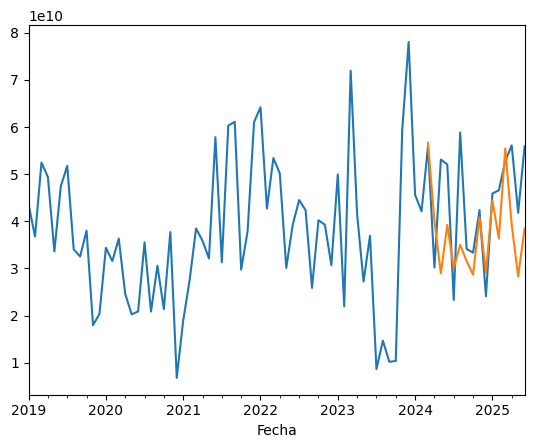

In [26]:
df['UTILIDAD'].plot()
np.exp(pred_modelo).plot()
plt.show()

In [27]:
rmse = root_mean_squared_error(np.exp(y_test), np.exp(pred_modelo))
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_modelo))
r2 = r2_score(y_test, pred_modelo)

print(f'rmse del modelo: {rmse}')
print(f'mape del modelo: {mape}')


rmse del modelo: 12256231699.180779
mape del modelo: 0.21482916527368792


Probamos de nuevo una serie de modelos utilizando esta misma combinación de variables exógenas